In [2]:
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns, numpy as np, nltk, re
from collections import Counter
from nltk.corpus import stopwords
sns.set_style('darkgrid')

In [3]:
steam_games = pd.read_parquet(r"C:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos Individuales\Machine Learning Operations\Datasets\steam_games.parquet")

steam_games.head()

,publisher,genres,app_name,title,release_date,tags,specs,price,id,developer
0,Kotoshiro,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",[Single-player],4.99,761140,Kotoshiro
1,"Making Fun, Inc.","[Free to Play, Indie, RPG, Strategy]",Ironbound,Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...","[Single-player, Multi-player, Online Multi-Pla...",0.00,643980,Secret Level SRL
2,Poolians.com,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...","[Single-player, Multi-player, Online Multi-Pla...",0.00,670290,Poolians.com
3,彼岸领域,"[Action, Adventure, Casual]",弹炸人2222,弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",[Single-player],0.99,767400,彼岸领域
4,Trickjump Games Ltd,"[Action, Adventure, Simulation]",Battle Royale Trainer,Battle Royale Trainer,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...","[Single-player, Steam Achievements]",3.99,772540,Trickjump Games Ltd


## **`Duplicados`**

In [4]:
steam_games[steam_games['id'].duplicated()==True]

,publisher,genres,app_name,title,release_date,tags,specs,price,id,developer
10099,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,2017-10-26,"[Action, FPS, Gore, Violent, Alternate History...","[Single-player, Steam Achievements, Full contr...",59.99,612880,Machine Games


In [5]:
steam_games[steam_games['id']==612880]

,publisher,genres,app_name,title,release_date,tags,specs,price,id,developer
9651,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,2017-10-26,"[Action, FPS, Gore, Violent, Alternate History...","[Single-player, Steam Achievements, Full contr...",59.99,612880,Machine Games
10099,Bethesda Softworks,[Action],Wolfenstein II: The New Colossus,Wolfenstein II: The New Colossus,2017-10-26,"[Action, FPS, Gore, Violent, Alternate History...","[Single-player, Steam Achievements, Full contr...",59.99,612880,Machine Games


## **`Nulos`**

In [6]:
steam_games.isnull().value_counts().to_dict()

{(False, False, False, False, False, False, False, False, False, False): 22525}

## **`Análisis Univariable`**

In [7]:
steam_games.columns

Index(['publisher', 'genres', 'app_name', 'title', 'release_date', 'tags',
       'specs', 'price', 'id', 'developer'],
      dtype='object')

### **`Publisher`**

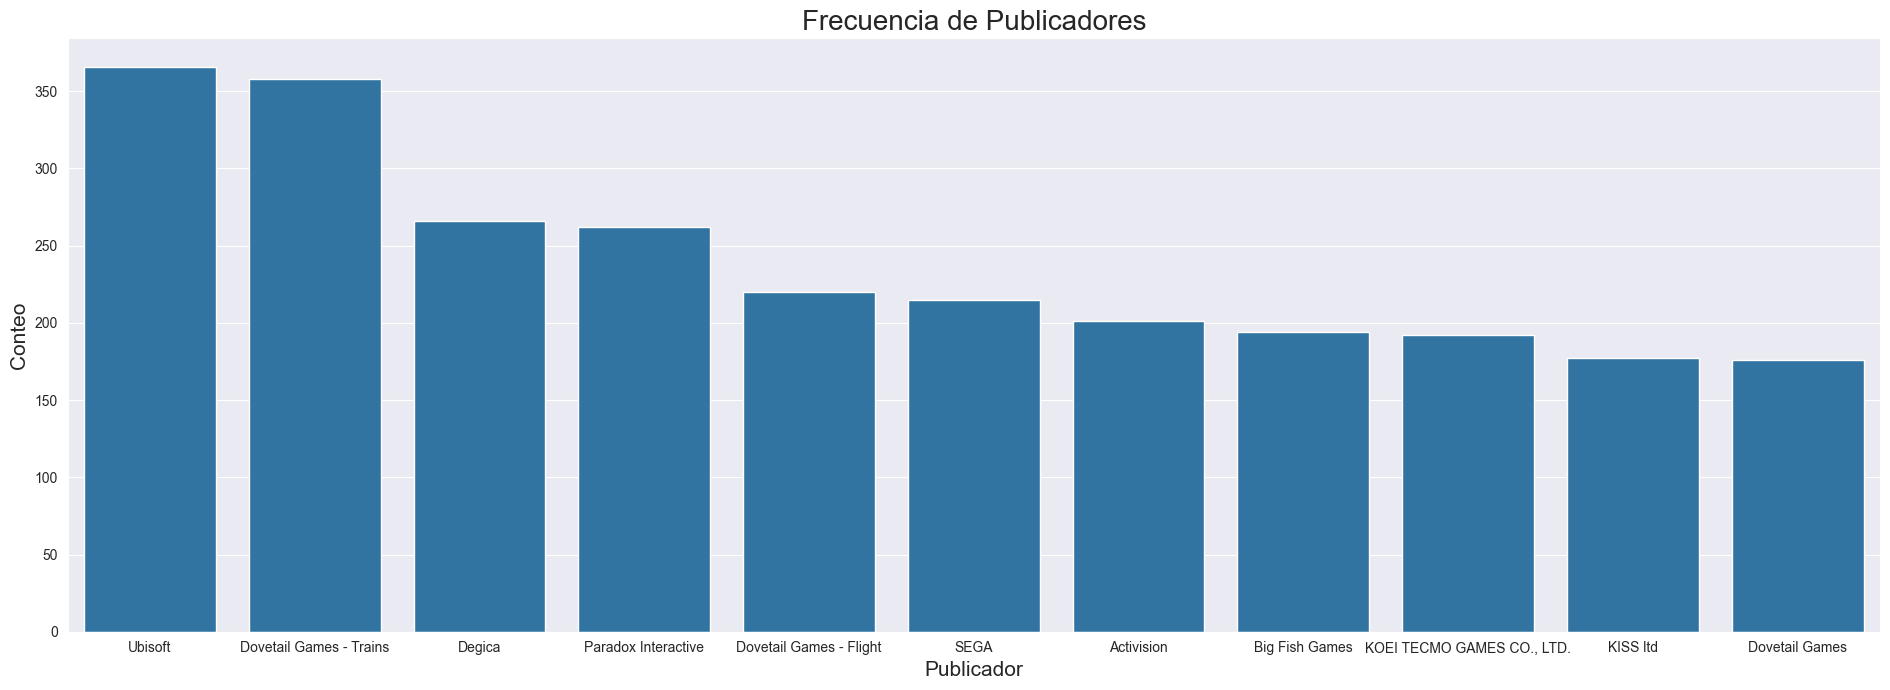

In [8]:
publisher = steam_games['publisher'].value_counts()

plt.figure(figsize=(19,7))

sns.countplot(data=steam_games, x='publisher', order=publisher.index[:11],)

plt.title("Frecuencia de Publicadores", fontsize=20)
plt.ylabel("Conteo", fontsize=15)
plt.xlabel("Publicador", fontsize=15)
plt.tight_layout()
plt.show()

### **`Genres`**

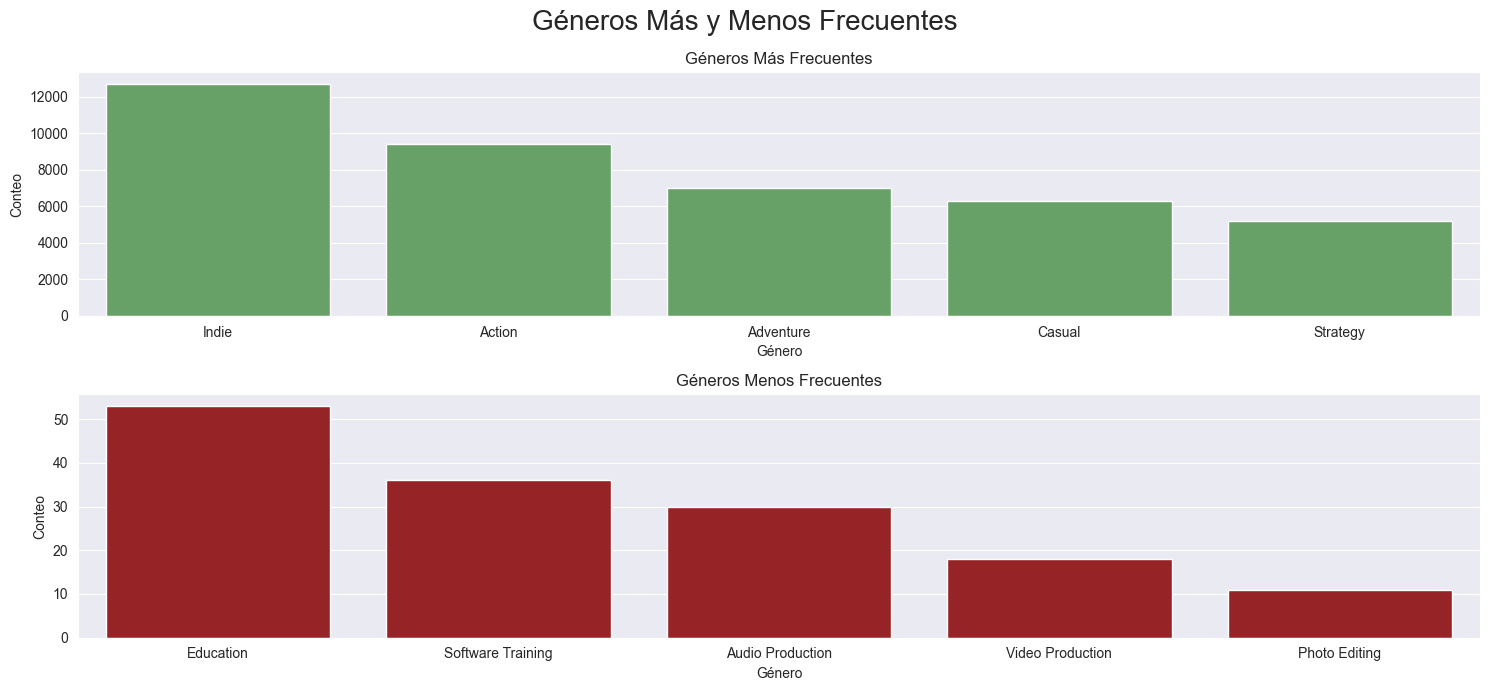

In [9]:
lis = []

for i in steam_games['genres']:
    lis.extend(i)

genres = dict(sorted(dict(Counter(lis)).items(), key=lambda item: item[1], reverse=True))

fig, (ax1,ax2) = plt.subplots(2,1)
fig.set_figheight(7)
fig.set_figwidth(15)
fig.suptitle("Géneros Más y Menos Frecuentes", fontsize=20)

sns.barplot(x=list(genres.keys())[:5], y=list(genres.values())[:5], ax=ax1, color='#5dab5d')
ax1.set_title("Géneros Más Frecuentes")
ax1.set_ylabel("Conteo")
ax1.set_xlabel("Género")

sns.barplot(x=list(genres.keys())[-5:], y=list(genres.values())[-5:], ax=ax2, color="#a91012")
ax2.set_title("Géneros Menos Frecuentes")
ax2.set_ylabel("Conteo")
ax2.set_xlabel("Género")

plt.tight_layout()
plt.show()

### **`App Name`**

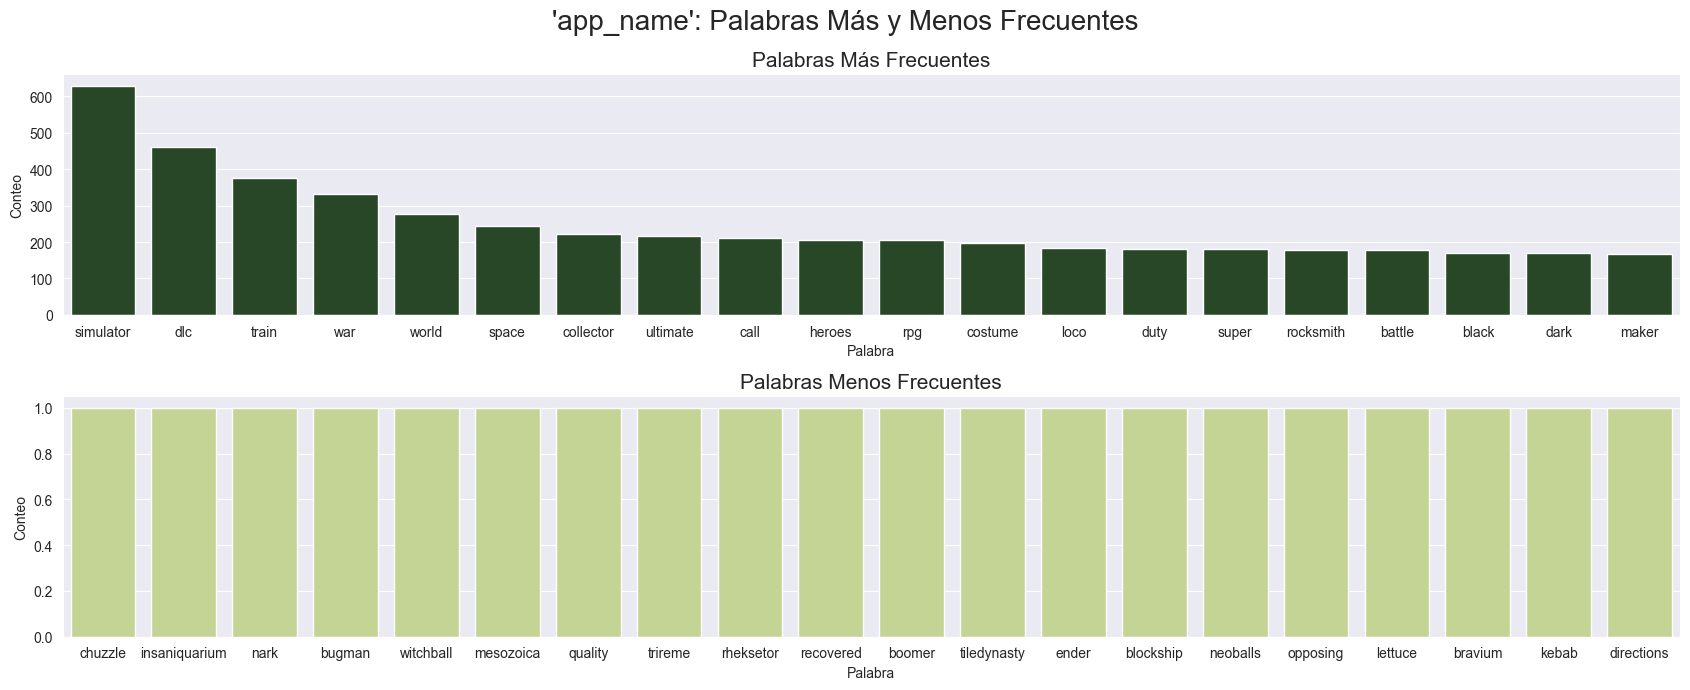

In [17]:
stop = stopwords.words("english")

stop.extend(["ii","edition","x","fsx","original","add","pack","soundtrack","steam","game","pearsandgraywitch"])

def TokenizeWord(s:str)->list:
    ans = nltk.tokenize.word_tokenize(re.sub(r"[^a-z]"," ",s.lower()))
    return [i for i in ans if i not in stop]

app_name_tokenized = steam_games['app_name'].apply(TokenizeWord)

lis = []

for i in app_name_tokenized:
    lis.extend(i)

app_name = dict(sorted(dict(Counter(lis)).items(), key= lambda item: item[1], reverse=True))

fig, (ax1,ax2) = plt.subplots(2,1)
fig.set_figheight(7)
fig.set_figwidth(17)
fig.suptitle("'app_name': Palabras Más y Menos Frecuentes",fontsize=20)

sns.barplot(x=list(app_name.keys())[:20], y=list(app_name.values())[:20], ax=ax1, color="#234d20")
ax1.set_title("Palabras Más Frecuentes", fontsize=15)
ax1.set_ylabel("Conteo",)
ax1.set_xlabel("Palabra",)

sns.barplot(x=list(app_name.keys())[-20:], y=list(app_name.values())[-20:], ax=ax2, color="#c9df8a")
ax2.set_title("Palabras Menos Frecuentes",fontsize=15)
ax2.set_ylabel("Conteo")
ax2.set_xlabel("Palabra")

plt.tight_layout()
plt.show()

### **`Title`**

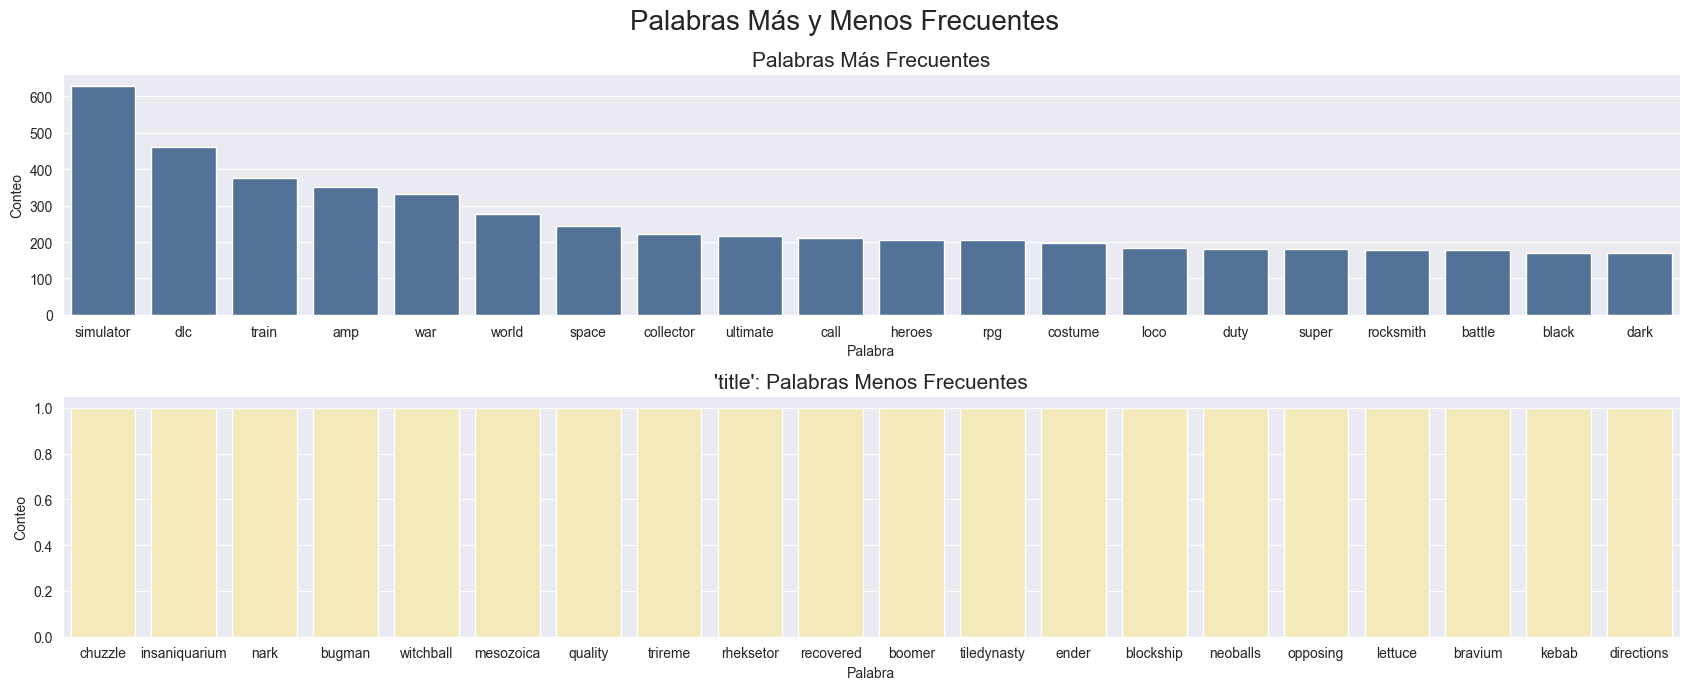

In [24]:
stop = stopwords.words("english")

stop.extend(["ii","edition","x","fsx","original","add","pack","soundtrack","steam","game","pearsandgraywitch"])

def TokenizeWord(s:str)->list:
    ans = nltk.tokenize.word_tokenize(re.sub(r"[^a-z]"," ",s.lower()))
    return [i for i in ans if i not in stop]

title_tokenized = steam_games['title'].apply(TokenizeWord)

lis = []

for i in title_tokenized:
    lis.extend(i)

title = dict(sorted(dict(Counter(lis)).items(), key= lambda item: item[1], reverse=True))

fig, (ax1,ax2) = plt.subplots(2,1)
fig.set_figheight(7)
fig.set_figwidth(17)
fig.suptitle("Palabras Más y Menos Frecuentes",fontsize=20)

sns.barplot(x=list(title.keys())[:20], y=list(title.values())[:20], ax=ax1, color="#4771a3")
ax1.set_title("Palabras Más Frecuentes", fontsize=15)
ax1.set_ylabel("Conteo",)
ax1.set_xlabel("Palabra",)

sns.barplot(x=list(title.keys())[-20:], y=list(title.values())[-20:], ax=ax2, color="#fdefb0")
ax2.set_title("'title': Palabras Menos Frecuentes",fontsize=15)
ax2.set_ylabel("Conteo")
ax2.set_xlabel("Palabra")

plt.tight_layout()
plt.show()

### **`Release Date`**

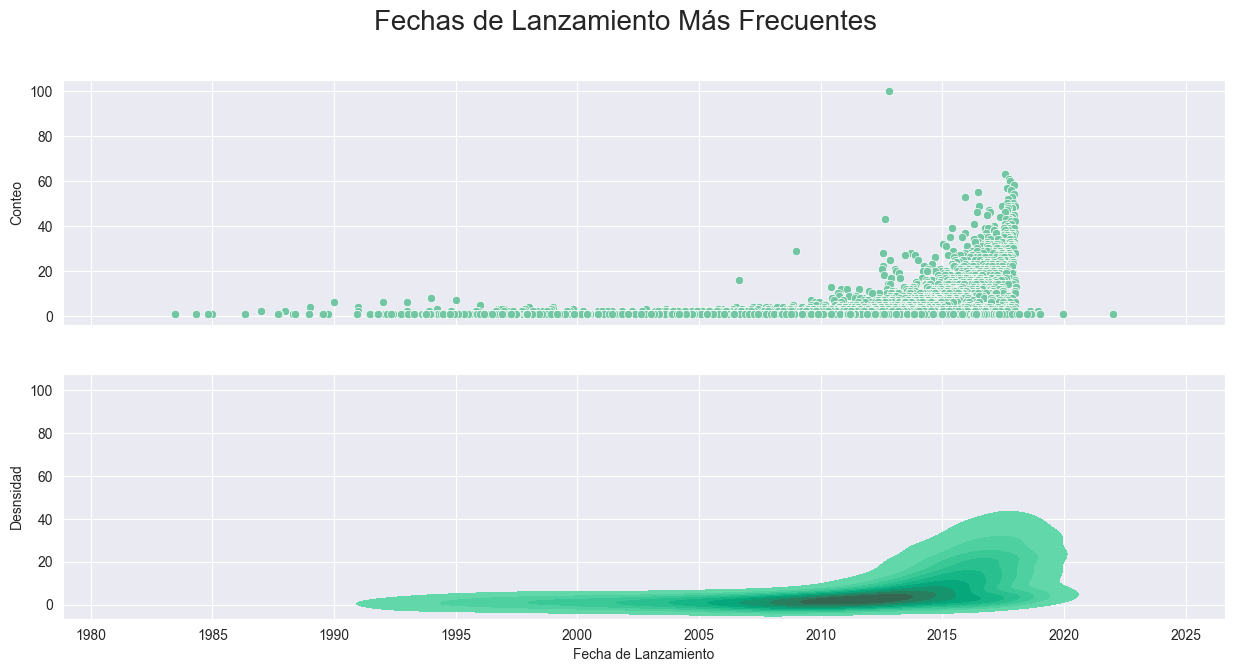

In [102]:
release_date = steam_games['release_date'].value_counts()

fig, (ax1,ax2) = plt.subplots(2,1, sharex=True)
fig.set_figheight(7)
fig.set_figwidth(15)
fig.suptitle("Fechas de Lanzamiento Más Frecuentes", fontsize=20)

sns.scatterplot(x=release_date.index, y=release_date, ax=ax1, color='#73c6a3')
ax1.set_ylabel("Conteo")

sns.kdeplot(x=release_date.index, y=release_date, fill=True, ax=ax2, color="#026649")
ax2.set_xlabel("Fecha de Lanzamiento")
ax2.set_ylabel("Desnsidad")

plt.show()

### **`Tags`**

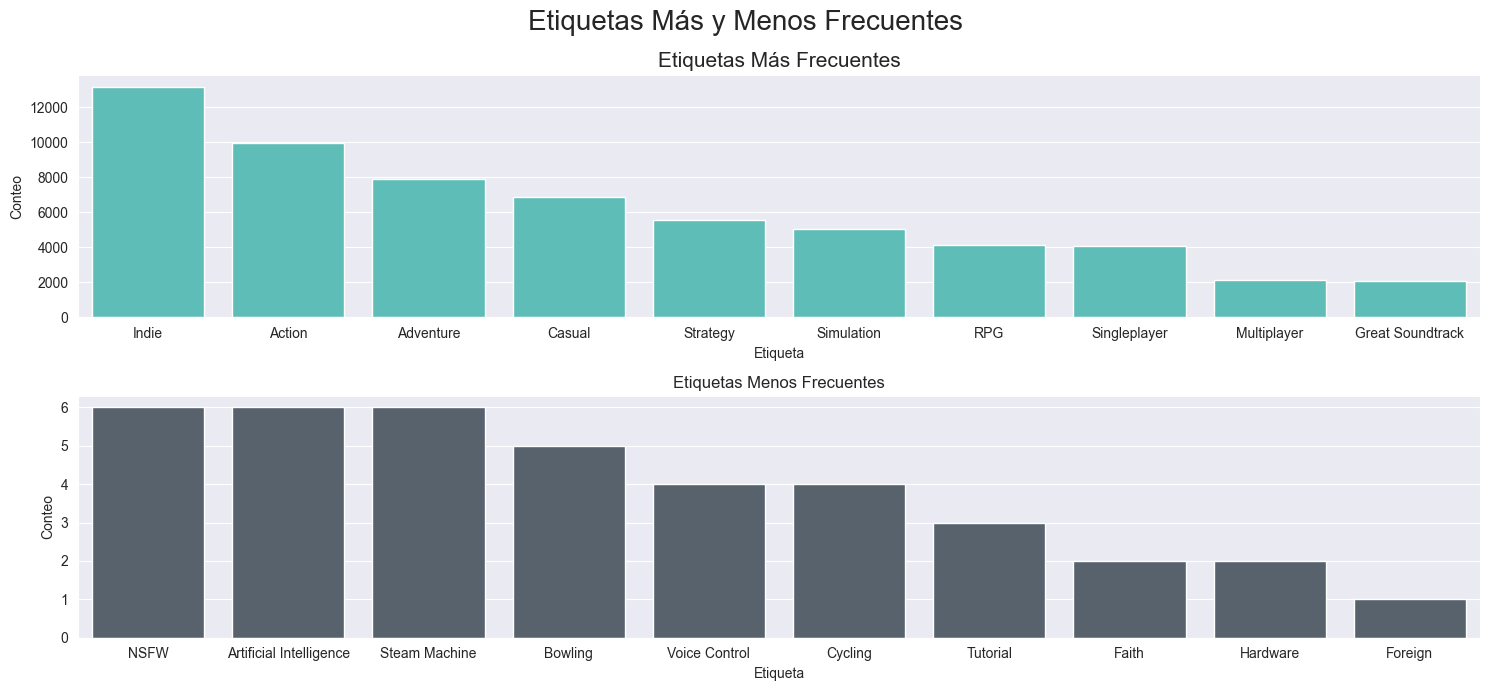

In [54]:
lis = []

for i in steam_games['tags']:
    lis.extend(i)

tags = dict(sorted(dict(Counter(lis)).items(), key=lambda i:i[1],reverse=True))

fig, (ax1,ax2) = plt.subplots(2,1)
fig.set_figheight(7)
fig.set_figwidth(15)
fig.suptitle("Etiquetas Más y Menos Frecuentes", fontsize=20)

sns.barplot(x=list(tags.keys())[:10], y=list(tags.values())[:10], ax=ax1, color="#4ecdc4")
ax1.set_title("Etiquetas Más Frecuentes", fontsize=15)
ax1.set_ylabel("Conteo")
ax1.set_xlabel("Etiqueta")

sns.barplot(x=list(tags.keys())[-10:], y=list(tags.values())[-10:], ax=ax2, color="#556270")
ax2.set_title("Etiquetas Menos Frecuentes")
ax2.set_xlabel("Etiqueta")
ax2.set_ylabel("Conteo")

plt.tight_layout()
plt.show()

### **`Específicaciones`**

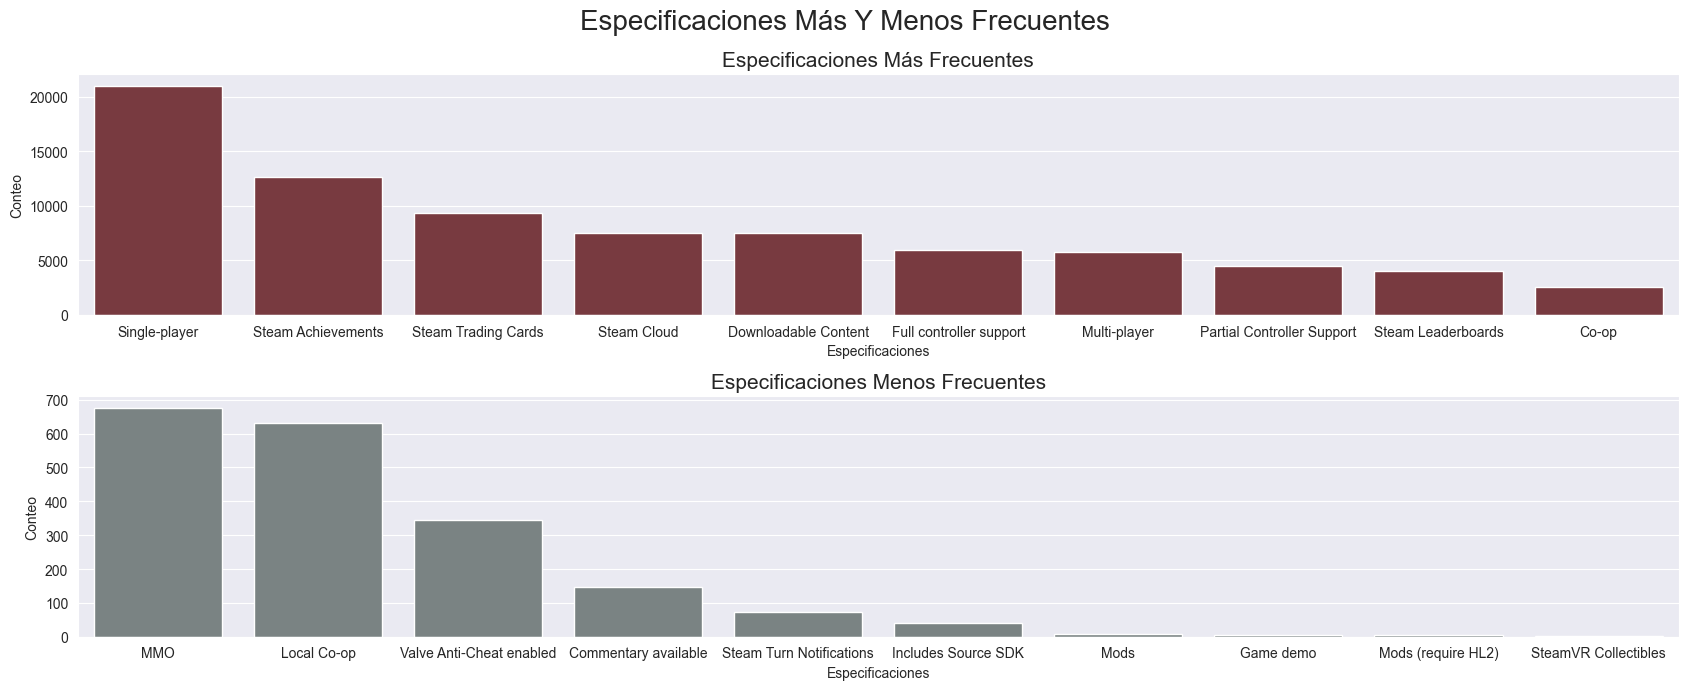

In [65]:
lis = []

for i in steam_games['specs']:
    lis.extend(i)

specs = dict(sorted(dict(Counter(lis)).items(),key=lambda i:i[1],reverse=True))

fig, (ax1,ax2) = plt.subplots(2,1)
fig.set_figheight(7)
fig.set_figwidth(17)
fig.suptitle("Especificaciones Más Y Menos Frecuentes", fontsize=20)

sns.barplot(x=list(specs.keys())[:10], y=list(specs.values())[:10], ax=ax1, color="#823038")
ax1.set_title("Especificaciones Más Frecuentes", fontsize=15)
ax1.set_xlabel("Especificaciones")
ax1.set_ylabel("Conteo")

sns.barplot(x=list(specs.keys())[-10:], y=list(specs.values())[-10:], ax=ax2, color="#788585")
ax2.set_title("Especificaciones Menos Frecuentes", fontsize=15)
ax2.set_ylabel("Conteo")
ax2.set_xlabel("Especificaciones")

plt.tight_layout()
plt.show()

### **`Precio`**

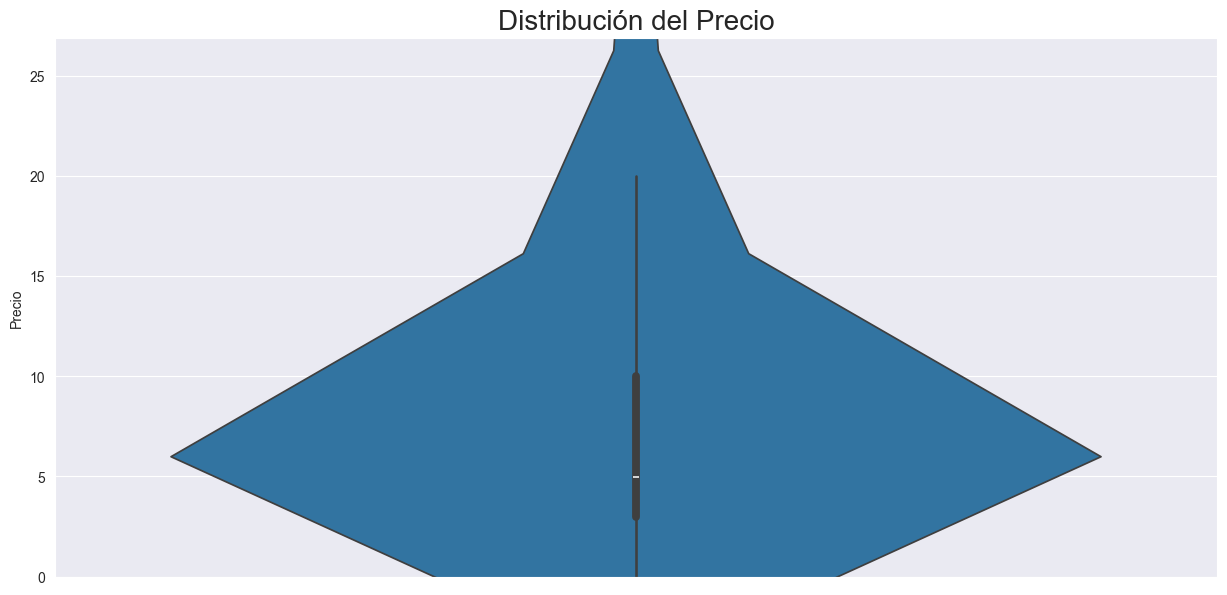

In [81]:
plt.figure(figsize=(15,7))

sns.violinplot(data=steam_games, y='price')

plt.title("Distribución del Precio",fontsize=20)
plt.ylabel("Precio")
plt.ylim(0, np.mean(steam_games['price'])*3)
plt.show()

### **`Desarrollador`**

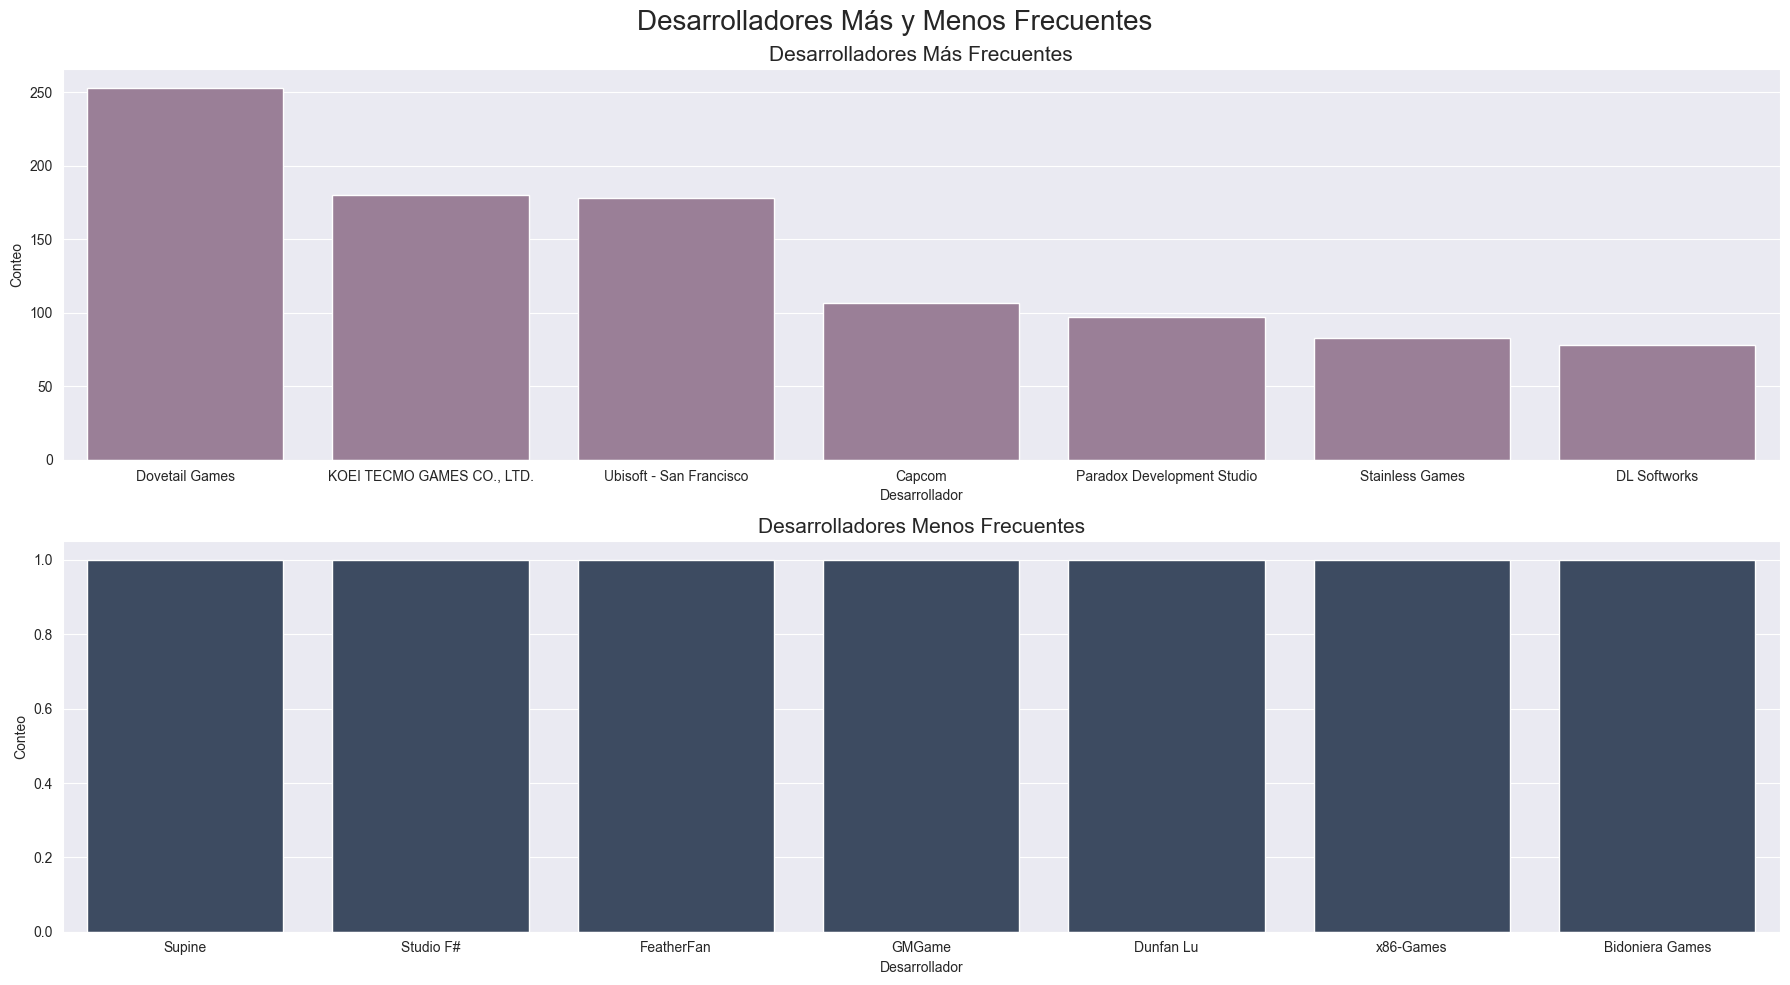

In [100]:
developer = steam_games['developer'].value_counts()

fig, (ax1,ax2) = plt.subplots(2,1)
fig.set_figheight(10)
fig.set_figwidth(18)
fig.suptitle("Desarrolladores Más y Menos Frecuentes", fontsize=20)

sns.countplot(data=steam_games, x='developer', order=developer.index[:7], ax=ax1, color="#9E7B9B")
ax1.set_title("Desarrolladores Más Frecuentes", fontsize=15)
ax1.set_ylabel("Conteo")
ax1.set_xlabel("Desarrollador")

sns.countplot(data=steam_games, x='developer', order=developer.index[-7:], ax=ax2, color="#374A67")
ax2.set_title("Desarrolladores Menos Frecuentes", fontsize=15)
ax2.set_ylabel("Conteo")
ax2.set_xlabel("Desarrollador")

plt.tight_layout()
plt.show()